# **Determinare la potabilità dell'acqua in base alla sua confrmazione**

**Programmazione di Applicazioni Data Intensive**

Laurea in Ingegneria e Scienze informatiche

DISI - Università di Bologna campus di Cesena

Milandri Nicola



### DESCRIZIONE DEL PROBLEMA E ANALISI ESPLORATIVA

Si deve realizzare un modello che sia in grado di classificare diversi tipi di acqua, in base alle loro conformazioni per determinare se siano potabili o meno


In [180]:
pip install seaborn


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import os
%matplotlib inline

### **Caricamento dei dati e preprocessing**

Andiamo a scaricare i dati necessari ad addestrare i nostri modelli

In [182]:
file_zip_name = "potability.zip"
file_csv_name = "water_potability.csv"

if not os.path.exists(file_zip_name):
    from urllib.request import urlretrieve
    urlretrieve("https://github.com/Chiefmilo/-progetto-data-intensive/raw/main/potability.zip", file_zip_name)
    from zipfile import ZipFile



In [183]:
!unzip "potability.zip"


Archive:  potability.zip
replace water_potability.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: water_potability.csv    


In [184]:
data_raw = pd.read_csv(file_csv_name)

In [185]:
data_raw.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Di seguito sono riportate le informazioni riguardo ai dati, le features, le dimensioni in memoria e le varie istanze non nulle


In [186]:
data_raw.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**bold text**### **Descrizione delle feature**

Il DataFrame creato presenta le seguenti feature:


-  **Ph:** ph dell'acqua
-   **Hardness:** durezza dell'acqua, valore che esprime il contenuto totale di ioni di calcio e magnesio e di eventuali metalli pesanti.
-   **Solids:** solidi dissolti totalmente in ppm(parts per milion)
-   **CHloramines:** quantità di cloroammine presenti in ppm
-   **Sulfate:** quantità di solfati dissolti in mg/l(milligram/liter)
-   **Conductivity:** conduttività elettrica dell'acqua in  μS/cm
-   **Organic_Carbon:** quantità di carbonio organico in ppm
-   **Trihalamethanes:**quantità di Trilometani in μg/l
-   **Turbidity:**Misure della proprietà di emissione luminosa dell'acqua in NTU
-   **Potability:**indica se l'acqua è potabile o meno
  - 0 = non potabile
  - 1 = potabile

  














> 






























### Analisi generale dei dati

Studiamo le caratteristiche dei dati in nostro possesso in modo da poter comprendere al meglio le caratteristiche del dominio applicativo

Diverse sono le colonne che presentano valori nan al loro interno, non essendo valori deducibili tramite i dati delle altre features decidiamo di eliminare le righe contenenti valori nan

In [187]:
data_raw.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Dal grafico si può notare come le acque potabili presentino un più alto valore delle sue componenti rispetto a quelle non potabili, facendo risultare le non potabili più numerose rispetto alle potabili, si può notare meglio tramite il grafico delle acque potabili e non.

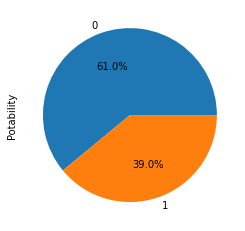

In [188]:
data_raw.Potability.value_counts().plot.pie(autopct="%.1f%%");

Dal grafico possiamo notare come la maggior parte delle acque siano non potabili 


Di seguito andremo a presentare le altre variabili presenti nel dataframe per andare ad analizzare la loro distibuzione

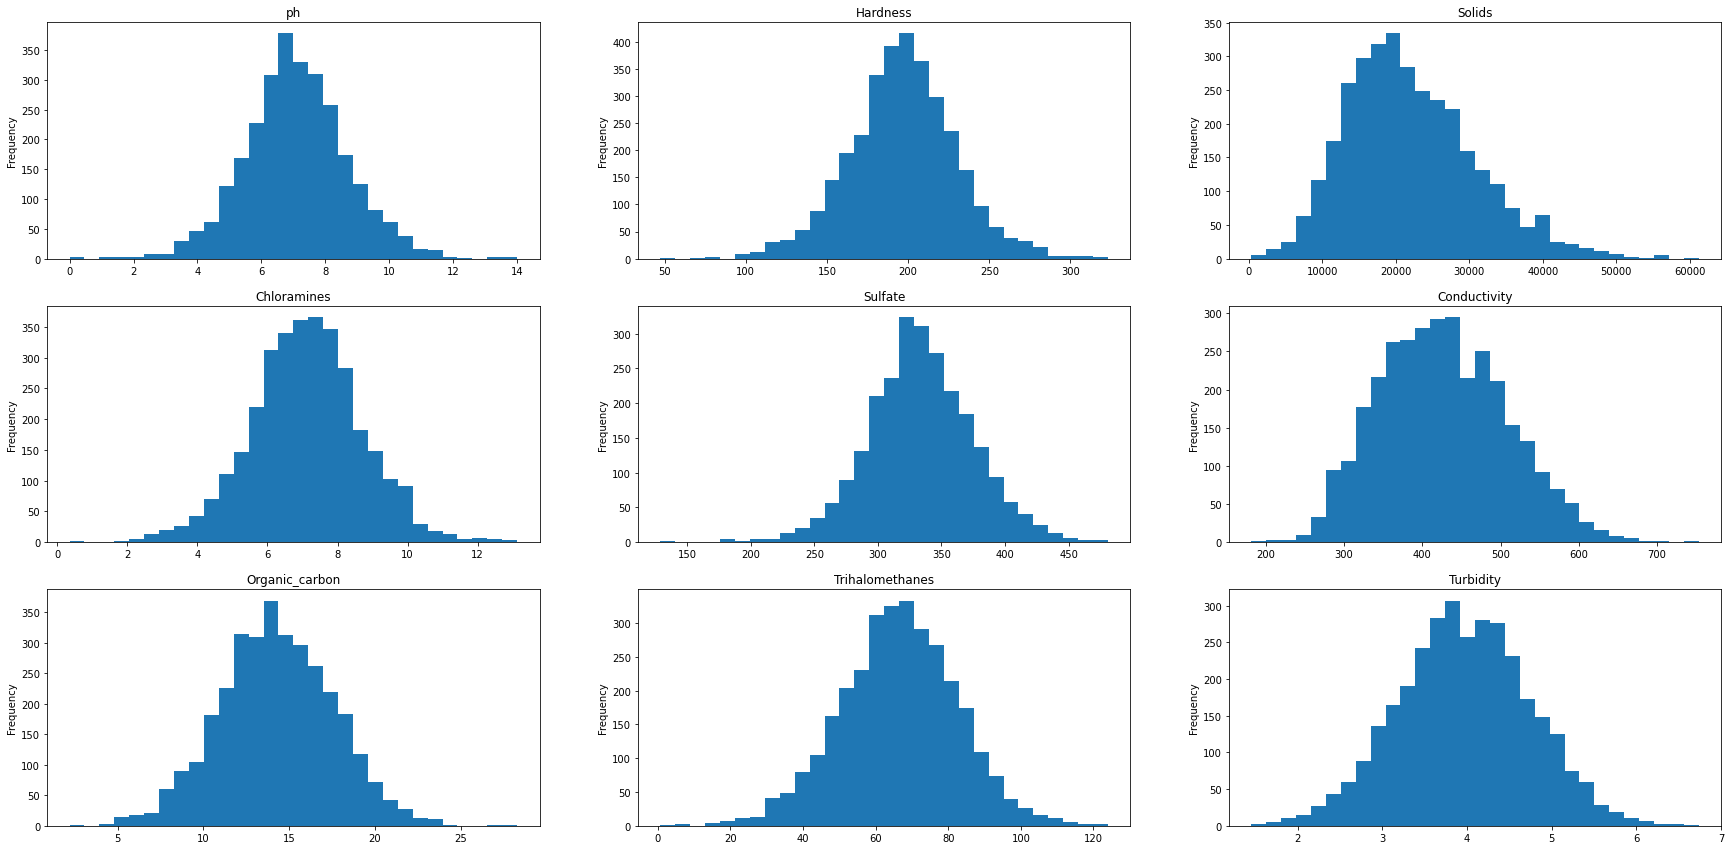

In [189]:
plt.figure(figsize=(30, 20));
for n, value in enumerate(["ph", "Hardness", "Solids", "Chloramines",
                           "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"], start=1):
  data_raw[value].plot.hist(ax=plt.subplot(4,3,n), bins=30);
  plt.subplot(4, 3, n).set_title(value);


Dagli istogrammi rappresentati notiamo con le features presentino alte frequenze nei valori medi

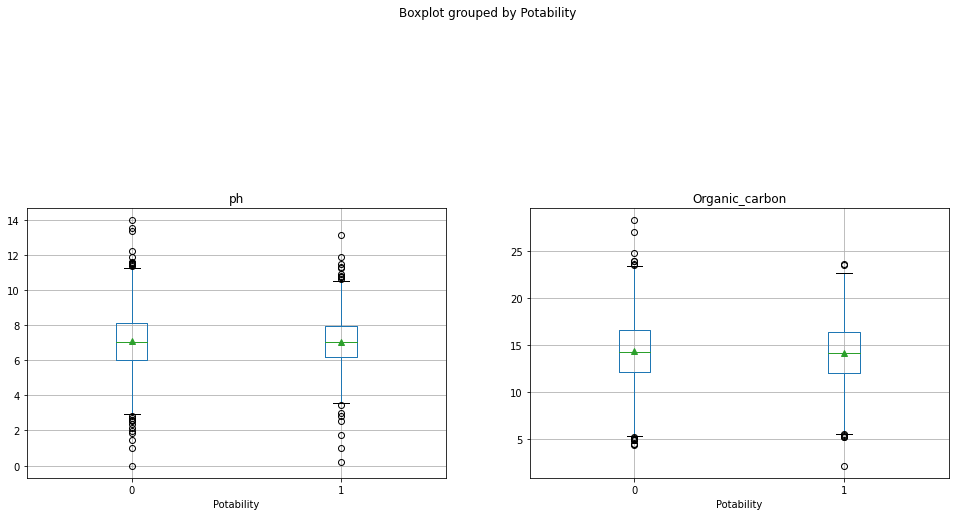

In [190]:
plt.figure(figsize=(16,35))
data_raw.boxplot(ax=plt.subplot(6,2,1), column="ph", by="Potability", showmeans=True)
data_raw.boxplot(ax=plt.subplot(6,2,2), column="Organic_carbon", by="Potability", showmeans=True)


*   **pH:**Possiamo notare come, a livello di ph, il grafico nella parte delle acque potabibili, presenti una maggiore densità dei valori sopra ad un valore di 10, mentre per le acque non potabili presenta una maggiore densità di valori a livelli di ph inferiori a circa 3.
*   **Organic_carbon:** Dal grafico si può notare come nella maggior parte dei casi le acque potabili sono acque che presentano un basso valore di Carbonio organico nella sua composizione.





Con una operazione di pivoting possiamo osservare meglio le varie caratteristiche in base alla variabile da predire

In [191]:
data_raw.pivot(columns="Potability")

ph              Hardness  ... Trihalomethanes Turbidity          
Potability         0         1           0  ...               1         0         1
0                NaN       NaN  204.890455  ...             NaN  2.963135       NaN
1           3.716080       NaN  129.422921  ...             NaN  4.500656       NaN
2           8.099124       NaN  224.236259  ...             NaN  3.055934       NaN
3           8.316766       NaN  214.373394  ...             NaN  4.628771       NaN
4           9.092223       NaN  181.101509  ...             NaN  4.075075       NaN
...              ...       ...         ...  ...             ...       ...       ...
3271             NaN  4.668102         NaN  ...       66.687695       NaN  4.435821
3272             NaN  7.808856         NaN  ...             NaN       NaN  2.798243
3273             NaN  9.419510         NaN  ...       69.845400       NaN  3.298875
3274             NaN  5.126763         NaN  ...       77.488213       NaN  4.708658
3275             NaN  7.874671         NaN  ...       78.698446       NaN  2.309149

[3276 rows x 18 columns]

Ora andremo a mostrare i grafici relativi ai valori più incisivi del dataframe pivotato

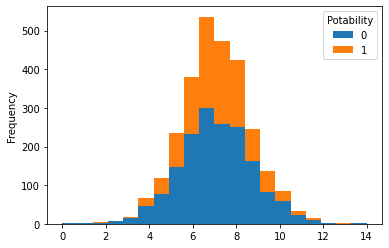

In [192]:
data_raw.pivot(columns="Potability")["ph"].plot.hist(bins=20, stacked=True);

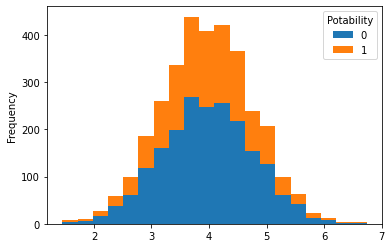

In [193]:
data_raw.pivot(columns="Potability")["Turbidity"].plot.hist(bins=20, stacked=True);

Le normative sulla potabilità dell'acqua destinata al consumo umano stabiliscono che il valore del ph deve dell'acqua erogata da un pubblico acquedotto sia compresa tra 6.5 e 9.5, e possiamo notare come sia la fascia con la frequenza media più alta.
Per quanto riguarda la torbidità dell'acqua si potrebbero trovare tipi di acqua potabili fino a 20 NTU, ma stando alle raccomandazioni OMS il livello massimo di torbidità non dovrebbe sforare i 5 NTU, dal grafico possiamo notare come la stragrande maggioranza dell'acqua potabile presenti un livello di torbidità di circa 5 o inferiore.

Andiamo a visualizzare i valori medi delle feature in correalzione alla potabilità

In [194]:
data_by_potability = data_raw.groupby("Potability")
data_by_potability.mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


Per andare a visualizzare se le variabili sono in correlazione fra loro andiamo a calcolare la variabile di Pearson, questa variabile ci permette di capire qtramite il suo valore quanto due feature siano in correlazione fra loro, tanto più il valore si avvicinerà ad 1 tanto più saranno correlate

In [195]:
ph = data_raw["ph"]
Chloramines = data_raw["Chloramines"]
Hardness = data_raw["Hardness"]
Solids = data_raw["Solids"]
Sulfate = data_raw["Sulfate"]
Conductivity = data_raw["Conductivity"]
Organic_carbon = data_raw["Organic_carbon"]
Trihalomethanes= data_raw["Trihalomethanes"]
Turbidity = data_raw["Turbidity"]

In [196]:
np.mean((ph-ph.mean()) * (Sulfate-Sulfate.mean())) / (ph.std() * Sulfate.std())

0.017935377395374968

In [197]:
np.mean((ph-ph.mean()) * (Chloramines-Chloramines.mean())) / (ph.std() * Chloramines.std())

-0.03448999658201429

In [198]:
np.mean((Trihalomethanes-Trihalomethanes.mean()) * (Chloramines-Chloramines.mean())) / (Trihalomethanes.std() * Chloramines.std())

0.017048275648296033

In [199]:
np.mean((Trihalomethanes-Trihalomethanes.mean()) * (Turbidity-Turbidity.mean())) / (Trihalomethanes.std() * Turbidity.std())

-0.022046829992437192

Dai dati ottenuti e da altre prove fatte possiamo giungere alla conclusione che le feature non siano correlate fra di loro, il valore più alto infatti non raggiunge neanche lo 0,1

### **Normalizzazione**

Il passaggio successivo sarà quello della standardizzazione/normalizzazione dei dati

Dai dati in nostro possesso notiamo che le scale dei valori presentano valori numerici molto diversi fra loro, tramite la normalizzazione andiamo a rendere questi valori più simili fra loro rendendoli così più facili da confrontare

Di seguito verrà presentato un esempio che permetta di capire perchè sia necessaria, in questo caso, la normalizzazione dei dati.

In [200]:
data_raw[["ph", "Solids"]]

,ph,Solids
0,NaN,20791.318981
1,3.716080,18630.057858
2,8.099124,19909.541732
3,8.316766,22018.417441
4,9.092223,17978.986339
...,...,...
3271,4.668102,47580.991603
3272,7.808856,17329.802160
3273,9.419510,33155.578218
3274,5.126763,11983.869376


In [201]:
scores = {}
f1_scores = {}
precision = {}
recall = {}
models = {}
confusion_matrice = {}

Prima di attuare il processi di Normalizzazione andremo ad utilizzare il metodo Hold-Out che ci permetterà di suddividere i dati che serviranno poi per l'addestramento dei modelli

In [202]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix

Andiamo a visualizzare i valori nan presenti in ciascuna delle colonne del DataFrame

In [203]:
data_raw.shape[0]-data_raw.count()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Notiamo che nelle colonne relative al ph, ai solfati disciolti e in quella relativa alla quantità di trilometani si trovano diversi valori nulli.

Procediamo elimimando queste righe

In [204]:
data_raw.dropna(inplace=True)

In [205]:
data_raw.shape[0]-data_raw.count()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Estraiamo dal Dataframe la variabile che dovremo predire, rendendo il Dataframe composto solo dalle variabili necessarie per predire quella estratta.

In [206]:
y = data_raw["Potability"]
X = data_raw.drop(columns=['Potability'])

In [207]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


Andiamo ad utilizzare il metodo **holdout** per poter dividere i dati in validation e training set

In [208]:
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=1/3, random_state=42) 

In [209]:
mod = Pipeline([
                  ("perc", Perceptron(n_jobs=-1, random_state=42))
])

In [210]:
mod.fit(X_train, y_train)
print("R-squared coefficient:")
mod.score(X_val, y_val)

R-squared coefficient:


0.6005961251862891

Il modello presenta un tasso di accuratezza discretamente buono, 60.1%, nonostante i dati non siano normalizzati.
Ciò è dato dal fatto che gli ordini di grandezza delle varibili all'interno del DataFrame non sono eccessivamente diversi.

Ora proviamo a standardizzare le features e vediamo come ciò incide sui nostri risultati.

In [211]:
std_mod = Pipeline([
                      ("scaler", StandardScaler()),
                      ("perc", Perceptron(n_jobs=-1, random_state=42))
])

In [212]:
std_mod.fit(X_train, y_train)
print("R-squared coefficient:")
std_mod.score(X_val, y_val)

R-squared coefficient:


0.5216095380029806

La Standardizzazione del modello non porta miglioramenti nei risultati.
Proviamo ad aggiungere una regolarizzazione tramite la norma L1 in modo da individuare le features più rilevanti.

In [213]:
std_l1_mod = Pipeline([
                      ("scaler", StandardScaler()),
                      ("perc", Perceptron(penalty="l1", alpha=0.0001, n_jobs=-1, random_state=42))
])

In [214]:
std_l1_mod.fit(X_train, y_train)
print("R-squared coefficient:")
std_l1_mod.score(X_val, y_val)

R-squared coefficient:


0.5096870342771982

In [215]:
coef = pd.DataFrame(std_l1_mod.named_steps["perc"].coef_[0], columns=["coefficients"], index=X.columns)
coef

,coefficients
ph,0.000000
Hardness,0.821713
Solids,1.298875
Chloramines,0.000000
Sulfate,0.000000
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,0.000000
Turbidity,0.000000


Sottolineamo come la precisione dei modelli sopracitati non siano da considerare poichè all'interno del DataFrame sono presenti alcune classi sbilanciate che portano a generare un modello anch'esso sbilanciato

### **Modellizazione**

Avendo un DataFrame che presenta uno sbilanciamento delle classi ricorriamo al metodo BorderlineSMOTE, strategia di oversampling che permetterà di compensare lo sbilanciamento.

In [216]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [217]:
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)

Andiamo a creare delle librerie nelle quali andremo a salvare i dati ottenuti dall'analisi dei modelli

In [218]:
scores = {}
f1_scores = {}
precision = {}
recall = {}
model = {}
confusion_matrice = {}

Addestriamo un metodo Perceptron utilizzando GridSearch in modo da trovare i parametri più consoni al nostro scopo.

Andiamo a prendere in analisi i seguenti iperparametri:

*   **Normalizzazione delle features**
*   **Regolarizzazione del modello**
*   **Peso della regolarizzazione**
*   **Stima dell'intercetta**



In [219]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [220]:
perc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("perc", Perceptron(n_jobs=-1, random_state=42))
])

perc_grid = {
    "scaler": [None, StandardScaler()],
    "perc__penalty": ["l2", "l1", "elasticnet"],
    "perc__alpha": np.logspace(-3, 3, 10),
    "perc__fit_intercept": [False, True]
}

In [221]:
%%time

perc_gv = GridSearchCV(perc_model, perc_grid, cv=kfold, n_jobs=-1)
perc_gv.fit(X_train_res, y_train_res)

CPU times: user 1.05 s, sys: 20.8 ms, total: 1.07 s
Wall time: 3.42 s


In [222]:
print("Punteggio migliore: {score}".format(score=perc_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, perc_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, perc_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, perc_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=perc_gv.best_params_))

scores["perc"] = perc_gv.score(X_val, y_val);
f1_scores["perc"] = f1_score(y_val, perc_gv.predict(X_val), average="binary")
precision["perc"] = precision_score(y_val, perc_gv.predict(X_val))
recall["perc"] = recall_score(y_val, perc_gv.predict(X_val))
models["perc"] = perc_gv.best_estimator_
confusion_matrice["perc"] = pd.DataFrame(confusion_matrix(y_val, perc_gv.predict(X_val)), columns= perc_gv.classes_, index=perc_gv.classes_)

Punteggio migliore: 0.3979135618479881
F1 score: 0.5665236051502146
Precision score: 0.39759036144578314
Recall score: 0.9850746268656716
Parametri migliori: {'perc__alpha': 0.1, 'perc__fit_intercept': False, 'perc__penalty': 'l1', 'scaler': None}


Andiamo ad utilizzare la matrice di confusione per poter avere una migliore visualizzazione dei dati analizzati

In [223]:
confusion_matrice["perc"] 

,0,1
0,3,400
1,4,264


L'accuratezza del modello ottenuto tramite BorderlineSMOTE non è molto elevata, tramite la matrice di confusione, si può notare come il modello sia sbilanciato.

Per provare ad aggirare questo problema andiamo ad utilizzare il metodo della regressione logicstica

### **Regressione Logistica**

La regressione logistica è un modello di classificazione binaria che sfrutta il concetto di regressione lineare.

Per trovare i parametri più adatti al nostro scopo riutilizzeremo la GridSearch

In [224]:
from sklearn.linear_model import LogisticRegression

In [225]:
log_modello = Pipeline ([
    ("scaler", StandardScaler()),
    ("log", LogisticRegression(solver="saga", random_state=42))
])

log_grid = {
    "scaler": [None,StandardScaler()],
    "log__penalty": ["l2", "l1"],
    "log__C": np.logspace(-3,3,10),
    "log__fit_intercept": [False, True]
}

In [226]:
%%time

log_gv = GridSearchCV(log_modello, log_grid, cv=kfold, n_jobs=-1)
log_gv.fit(X_train_res, y_train_res)

CPU times: user 721 ms, sys: 20.1 ms, total: 741 ms
Wall time: 6.41 s


In [227]:
print("Punteggio migliore: {score}".format(score=log_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, log_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, log_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, log_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=log_gv.best_params_))

scores["log"] = log_gv.score(X_val, y_val);
f1_scores["log"] = f1_score(y_val, log_gv.predict(X_val), average="binary")
precision["log"] = precision_score(y_val, log_gv.predict(X_val))
recall["log"] = recall_score(y_val, log_gv.predict(X_val))
models["log"] = log_gv.best_estimator_
confusion_matrice["log"] = pd.DataFrame(confusion_matrix(y_val, log_gv.predict(X_val)), columns= log_gv.classes_, index=log_gv.classes_)

Punteggio migliore: 0.46646795827123694
F1 score: 0.42443729903536975
Precision score: 0.3728813559322034
Recall score: 0.4925373134328358
Parametri migliori: {'log__C': 0.001, 'log__fit_intercept': False, 'log__penalty': 'l2', 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [228]:
confusion_matrice["log"]

,0,1
0,181,222
1,136,132


Come la matrice di confusione ci fa notare abbiamo avuto un netto miglioramento nella corretta predizione del modello rispetto al metodo Perceptron.

Proveremo in seguito a modellare la nostra tabella tramite Support Vector Machine

### **SVM**

In [229]:
svc_modello = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(dual=False, random_state=42))
])

svc_grid = {
    "scaler": [None, StandardScaler()],
    "svc__penalty": ["l2", "l1"],
    "svc__loss": ["hinge", "squared_hinge"],
    "svc__fit_intercept": [False, True],
    "svc__class_weight": [None, "balanced"],
    "svc__C": np.logspace(-3, 3, 10)
}

In [230]:
%%time

svc_gv = GridSearchCV(svc_modello, svc_grid, cv=kfold, n_jobs=-1)
svc_gv.fit(X_train_res, y_train_res)

CPU times: user 2.08 s, sys: 24.4 ms, total: 2.1 s
Wall time: 9.05 s


In [231]:
print("Punteggio migliore: {score}".format(score=svc_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, svc_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, svc_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, svc_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=svc_gv.best_params_))

scores["svc"] = svc_gv.score(X_val, y_val);
f1_scores["svc"] = f1_score(y_val, svc_gv.predict(X_val), average="binary")
precision["svc"] = precision_score(y_val, svc_gv.predict(X_val))
recall["svc"] = recall_score(y_val, svc_gv.predict(X_val))
models["svc"] = svc_gv.best_estimator_
confusion_matrice["svc"] = pd.DataFrame(confusion_matrix(y_val, svc_gv.predict(X_val)), columns= svc_gv.classes_, index=svc_gv.classes_)

Punteggio migliore: 0.46795827123695977
F1 score: 0.43062200956937796
Precision score: 0.37604456824512533
Recall score: 0.503731343283582
Parametri migliori: {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'svc__C': 0.001, 'svc__class_weight': 'balanced', 'svc__fit_intercept': False, 'svc__loss': 'squared_hinge', 'svc__penalty': 'l2'}


In [232]:
confusion_matrice["svc"]

,0,1
0,179,224
1,133,135


Analizzando il modello ottenuto tramite il metodo SVM notiamo come la precisione della predizione dei dati sia aumentata, senza però ottenere buoni risultati.

### **Albero Decisionale**

Il prossimo metodo che andremo ad utilizzare per generare il modello da analizzare sarò quello dell'Albero Decisionale, o Decision Tree.

E' una funzione di regressione dove:

*   **Ogni nodo interno rappresenta una variabile**
*   **Un arco verso un nodo figlio rappresenta un possibile valore per quella proprietà**
*   **Una foglia, il valore predetto per la classe dalle altre proprietà, che nell'albero è rappresentato dal cammino(path), dal nodo radice(root), e dal nodo foglia**








In [233]:
from sklearn.tree import DecisionTreeClassifier

In [234]:
features_num = X.columns.size

dtree_mod = Pipeline ([
     ("scaler", StandardScaler()),
     ("dtree", DecisionTreeClassifier(class_weight="balanced", random_state=42))                  
])

dtree_grid = {'scaler': [None, StandardScaler()],
             'dtree__min_samples_split': range(2, 6),
             'dtree__min_samples_leaf': range(1, 6), 
             'dtree__max_depth': range(2,6),
             'dtree__max_features': range(2, features_num)}

In [235]:
%%time

dtree_gv = GridSearchCV(dtree_mod, dtree_grid, cv=kfold, n_jobs=-1)
dtree_gv.fit(X_train_res, y_train_res)

CPU times: user 7.13 s, sys: 64.1 ms, total: 7.2 s
Wall time: 33.6 s


In [236]:
print("Punteggio migliore: {score}".format(score=dtree_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, dtree_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, dtree_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, dtree_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=dtree_gv.best_params_))

scores["dtree"] = dtree_gv.score(X_val, y_val);
f1_scores["dtree"] = f1_score(y_val, dtree_gv.predict(X_val), average="binary")
precision["dtree"] = precision_score(y_val, dtree_gv.predict(X_val))
recall["dtree"] = recall_score(y_val, dtree_gv.predict(X_val))
models["dtree"] = dtree_gv.best_estimator_
confusion_matrice["dtree"] = pd.DataFrame(confusion_matrix(y_val, dtree_gv.predict(X_val)), columns=dtree_gv.classes_, index=dtree_gv.classes_)

Punteggio migliore: 0.5305514157973175
F1 score: 0.5176110260336907
Precision score: 0.43896103896103894
Recall score: 0.6305970149253731
Parametri migliori: {'dtree__max_depth': 5, 'dtree__max_features': 7, 'dtree__min_samples_leaf': 2, 'dtree__min_samples_split': 2, 'scaler': None}


In [237]:
confusion_matrice["dtree"]

,0,1
0,187,216
1,99,169


### **Random Forest**

In [238]:

forest_mod = Pipeline([
    ("scaler", StandardScaler()),
    ("forest", RandomForestClassifier(n_jobs=-1, random_state=42))
])
forest_grid = {"scaler": [None, StandardScaler()],
             'forest__n_estimators': range(5, 10),
             'forest__min_samples_split': range(2, 5), 
             'forest__max_depth': [None] + [i for i in range(1, 3)],
             'forest__max_features': [int(math.sqrt(features_num)), features_num - 1]}

In [239]:
%%time

rforest_gv = GridSearchCV(forest_mod, forest_grid, cv=kfold, n_jobs=-1)
rforest_gv.fit(X_train_res, y_train_res)

CPU times: user 4.64 s, sys: 186 ms, total: 4.83 s
Wall time: 1min 36s


In [240]:
print("Punteggio migliore: {score}".format(score=rforest_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, rforest_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, rforest_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, rforest_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=rforest_gv.best_params_))

scores["forest"] = rforest_gv.score(X_val, y_val);
f1_scores["forest"] = f1_score(y_val, rforest_gv.predict(X_val), average="binary")
precision["forest"] = precision_score(y_val, rforest_gv.predict(X_val))
recall["forest"] = recall_score(y_val, rforest_gv.predict(X_val))
models["forest"] = rforest_gv.best_estimator_
confusion_matrice["forest"] = pd.DataFrame(confusion_matrix(y_val, rforest_gv.predict(X_val)), columns=rforest_gv.classes_, index=rforest_gv.classes_)

Punteggio migliore: 0.6453055141579732
F1 score: 0.5369649805447472
Precision score: 0.5609756097560976
Recall score: 0.5149253731343284
Parametri migliori: {'forest__max_depth': None, 'forest__max_features': 8, 'forest__min_samples_split': 3, 'forest__n_estimators': 8, 'scaler': None}


In [241]:
confusion_matrice["forest"]

,0,1
0,295,108
1,130,138


Il modello della Random Forest è un'insieme di Decision Tree, come possiamo notare, in particolar modo guardando la matrice di confusione sopra riportata, è il modello che ci restituisce la miglior predizione, aumentando notevolmente il tasso di precisione rispetto al Decision Tree (risultato il miglior modello di quelli presi in analisi), 

### **Valutazione dei vari modelli**

In [242]:
print(models)

{'perc': Pipeline(memory=None,
         steps=[('scaler', None),
                ('perc',
                 Perceptron(alpha=0.1, class_weight=None, early_stopping=False,
                            eta0=1.0, fit_intercept=False, max_iter=1000,
                            n_iter_no_change=5, n_jobs=-1, penalty='l1',
                            random_state=42, shuffle=True, tol=0.001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False))],
         verbose=False), 'log': Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log',
                 LogisticRegression(C=0.001, class_weight=None, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                               

In [243]:
from sklearn.model_selection import cross_val_score

name_model = {
    'perc': 'Perceptron',
    'log': 'LogisticRegression',
    'svc': 'Support Vector Machines',
    'dtree': 'Decision Tree',
    'forest': 'Random Forest'
}

for model in models.values():
  print(name_model[list(model.named_steps.keys())[1]] +
        ": %0.6f di accuratezza con deviazione standard di %0.6f" % 
        (cross_val_score(models[list(model.named_steps.keys())[1]],X_val, y_val,cv=kfold).mean(), 
         cross_val_score(models[list(model.named_steps.keys())[1]],X_val, y_val,cv=kfold).std()))
  print('\n')

Perceptron: 0.475257 di accuratezza con deviazione standard di 0.115932


LogisticRegression: 0.485771 di accuratezza con deviazione standard di 0.027878


Support Vector Machines: 0.488734 di accuratezza con deviazione standard di 0.029894


Decision Tree: 0.557402 di accuratezza con deviazione standard di 0.053083


Random Forest: 0.606622 di accuratezza con deviazione standard di 0.048769




Andiamo a confrontare i vari modelli che sono stati generati durante l'analisi del DataSet.

Valutiamo i modelli attraverso il calcolo di:

*  **(R$^2$)**
*  **F1 Score**
*  **Precision**
*  **Recall score**








In [244]:
pd.DataFrame.from_dict(scores, orient="index", columns=["R^2 Score"])

,R^2 Score
perc,0.397914
log,0.466468
svc,0.467958
dtree,0.530551
forest,0.645306


In [245]:
pd.DataFrame.from_dict(f1_scores, orient="index", columns=["F1 score"])

,F1 score
perc,0.566524
log,0.424437
svc,0.430622
dtree,0.517611
forest,0.536965


In [246]:
pd.DataFrame.from_dict(precision, orient="index", columns=["Precision"])

,Precision
perc,0.397590
log,0.372881
svc,0.376045
dtree,0.438961
forest,0.560976


In [247]:
pd.DataFrame.from_dict(recall, orient="index", columns=["Recall score"])

,Recall score
perc,0.985075
log,0.492537
svc,0.503731
dtree,0.630597
forest,0.514925


Come abbiamo notato dalle matrici di confusione prese in analisi precedentemente e riproposte qui sotto, il DecisionTreeClassifier e, in particolar modo, il RandomTreeClassifier sono quelli che presentano generalmente i valori migliori.

In [249]:
print("Perceptron")
print(confusion_matrice["perc"])
print("\n")
print("Logistic Regression")
print(confusion_matrice["log"])
print("\n")
print("Support Vector Machines")
print(confusion_matrice["svc"])
print("\n")
print("Decision Tree")
print(confusion_matrice["dtree"])
print("\n")
print("Random Forest")
print(confusion_matrice["forest"])

Perceptron
   0    1
0  3  400
1  4  264


Logistic Regression
     0    1
0  181  222
1  136  132


Support Vector Machines
     0    1
0  179  224
1  133  135


Decision Tree
     0    1
0  187  216
1   99  169


Random Forest
     0    1
0  295  108
1  130  138


### **Valutazione dei modelli tramite l'utilizzo dell'Intervallo di confidenza**

In questa fase andremo a valutare l'intervallo di confidenza dei nostri modelli per vedere quale risulti il migliore fra quelli utilizzati.

In [250]:
def confidence(acc, N, Z):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()

In [251]:
pd.DataFrame([confidence(calculate_accuracy(confusion_matrice["perc"]), len(X_val), 1.96),
              confidence(calculate_accuracy(confusion_matrice["log"]), len(X_val), 1.96),
              confidence(calculate_accuracy(confusion_matrice["svc"]), len(X_val), 1.96),
              confidence(calculate_accuracy(confusion_matrice["dtree"]), len(X_val), 1.96),
              confidence(calculate_accuracy(confusion_matrice["forest"]), len(X_val), 1.96)],
                 index=["perceptron", "logistic reg", "SVM", "decision tree", "random forest"], columns=["inf", "sup"])

,inf,sup
perceptron,0.361560,0.435429
logistic reg,0.429019,0.504299
SVM,0.430493,0.505788
decision tree,0.492723,0.568032
random forest,0.608372,0.680584


Come si poteva già in precedenza notare il metodo random forest risulta quello che ci ha fornito l'analisi del modello più accurata

### **Valutazione tramite il confronto con un modello casuale**

Addestriamo un modello casuale e lo valutiamo in base a come performa sui dati del DataSet preso in analisi

In [252]:
from sklearn.dummy import DummyClassifier

In [253]:
random_model = DummyClassifier(strategy="uniform", random_state=42)
random_model.fit(X_train_res, y_train_res)

random_score = random_model.score(X_val, y_val)

print("Score: {score}".format(score=random_score));
print("F1 score: {score}".format(score=f1_score(y_val, random_model.predict(X_val))));
print("Precision score: {score}".format(score=precision_score(y_val, random_model.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, random_model.predict(X_val))))

scores["random"] = random_model.score(X_val, y_val);
f1_scores["random"] = f1_score(y_val, random_model.predict(X_val), average="binary")
precision["random"] = precision_score(y_val, random_model.predict(X_val))
recall["random"] = recall_score(y_val, random_model.predict(X_val))

Score: 0.5022354694485842
F1 score: 0.4560260586319218
Precision score: 0.4046242774566474
Recall score: 0.5223880597014925


In [254]:
confusion_matrice["random"] = pd.DataFrame(confusion_matrix(y_val, random_model.predict(X_val)), columns=random_model.classes_, index = random_model.classes_)

In [255]:
confusion_matrice["random"]

,0,1
0,197,206
1,128,140


I dati ottenuti da questo modello risultano migliori rispetto ad alcuni modelli, ma non paragonabili rispetto ad altri.

Ora andiamo a confrontare il modello ottenuto tramite un metodo casuale con qullo ottenuto tramite l'utilizzo della Random Forest.

In [259]:
from scipy import stats

def difference_between_two_models(error1, error2, confidence):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

In [261]:
for model in models.values():
  print(name_model[list(model.named_steps.keys())[1]] + " VS Modello Random")
  print("\n")
  difference_between_two_models(1 - f1_scores[list(model.named_steps.keys())[1]], 1 - f1_scores["random"], 0.99)

Perceptron VS Modello Random


Valore minimo: 0.047399056442488915
Valore massimo: 0.17359603659409667

LogisticRegression VS Modello Random


Valore minimo: -0.03142759367430688
Valore massimo: 0.09460511286741098

Support Vector Machines VS Modello Random


Valore minimo: -0.03766964394557491
Valore massimo: 0.08847774207066249

Decision Tree VS Modello Random


Valore minimo: -0.0017759873633507034
Valore massimo: 0.12494592216688848

Random Forest VS Modello Random


Valore minimo: 0.017645230288083777
Valore massimo: 0.14423261353756694



### **Conclusioni**


Andando ad analizzare i vari valori ottenuti non mi sento molto soddisfatto dei modelli ottenuti con i metodi: Perceptron, Logistic Regression e SVM in quanto restituiscono risultati peggiori rispetto a quello di un modello creato tramite un metodo randomico.
Viceversa mi ritengo soddisfatto dal modello ottenuto con il metodi RandomTreeClassifier, presenta score di determinazione e precision buoni, migliori di tutti gli altri modelli, presentando anche ottimi valori nell'intervallodi confidenza.